In [2]:
import numpy as np
from Bandits import Bandits
from BayesianBandit import Bayesian_Bandit
from Create_Dictionary import Ad_Dictionary
from plot_bar import plot_dictionaries
from BayesianBandit import regret

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'monospace',
        'weight' : 'medium',
        'size'   : 24}

matplotlib.rc('font', **font)

In [114]:
def plot_ads(_dict, values):
    """
    Plots a bar plot using the 
    xvalues = _dict.keys
    yvalues = values
    
    Input
    _dict = dictionary
    values = array of values (or list)
    
    Returns
    Barplot
    """
    fig, (ax0) = plt.subplots(1, 1, figsize = (10, 10))
    index = 0
    ax0.grid(zorder = 0, linestyle = 'dashed', color = '#acaaa8')
    xvalues = range(len(_dict.keys()))
    yvalues = values
    names   = [str(ad) for ad in _dict.keys()]
    ax0.bar(xvalues, yvalues, ec='#383632', color='#F26101', zorder = 3)
#     ax0.set_xticks(xvalues)
    ax0.set_xticklabels(['']*len(xvalues))
    ax0.set_ylabel('Percentage of Success')
    ax0.set_xlabel('Ad Type')
    plt.tight_layout()
    plt.show()

61.688


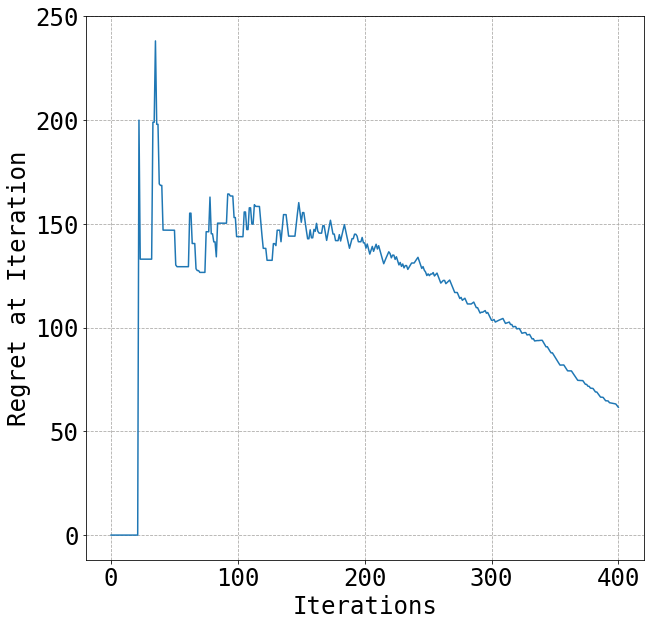

In [117]:
thresholds = [0]
myGame = Ad_Dictionary()
results = []

for threshold in thresholds:
    myGame.make_dictionary(assists = False, passes = False, threshold = threshold)
    bandits = Bandits(_dict = myGame.ad_dict)
    strat1 = Bayesian_Bandit(bandits)
    strat1.sample_bandits(401)
    # print("Number of trials: ", strat.trials)
    # print("Number of wins: ", strat.wins)
    # print("Conversion rates: ", strat.wins / strat.trials)
    # print("A total of %d wins of %d trials." %(strat.wins.sum(), strat.trials.sum())), '\n\n'

    result_dict = dict(zip(myGame.ad_dict.keys(), strat1.wins))
    results.append(result_dict)

    print regret(strat1.final_probabilities, np.array(strat1.choices))
    xvals = range(len(strat1.regret_list))
    fig = plt.figure(figsize=(10, 10))
    plt.grid(zorder = 0, linestyle = 'dashed', color = '#acaaa8')
    plt.plot(xvals, strat1.regret_list)
    plt.xlabel('Iterations')
    plt.ylabel('Regret at Iteration')
    plt.show()

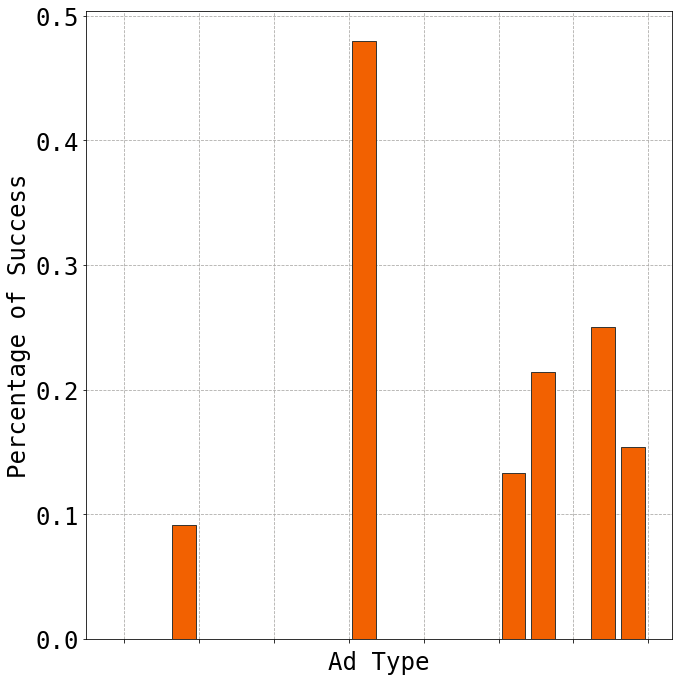

In [118]:
plot_ads(myGame.ad_dict, strat1.final_probabilities)

76.914


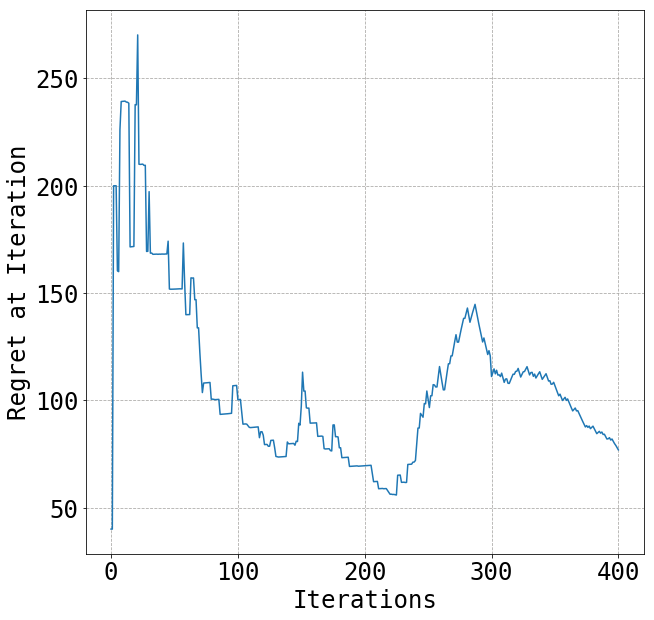

In [119]:
thresholds = [0]
myGame = Ad_Dictionary()
results = []

for threshold in thresholds:
    myGame.make_dictionary(assists = True, passes = False, threshold = threshold)
    bandits = Bandits(_dict = myGame.ad_dict)
    strat2 = Bayesian_Bandit(bandits)
    strat2.sample_bandits(401)
    # print("Number of trials: ", strat.trials)
    # print("Number of wins: ", strat.wins)
    # print("Conversion rates: ", strat.wins / strat.trials)
    # print("A total of %d wins of %d trials." %(strat.wins.sum(), strat.trials.sum())), '\n\n'

    result_dict = dict(zip(myGame.ad_dict.keys(), strat2.wins))
    results.append(result_dict)

    print regret(strat2.final_probabilities, np.array(strat2.choices))
    xvals = range(len(strat2.regret_list))
    fig = plt.figure(figsize=(10, 10))
    plt.grid(zorder = 0, linestyle = 'dashed', color = '#acaaa8')
    plt.plot(xvals, strat2.regret_list)
    plt.xlabel('Iterations')
    plt.ylabel('Regret at Iteration')
    plt.show()

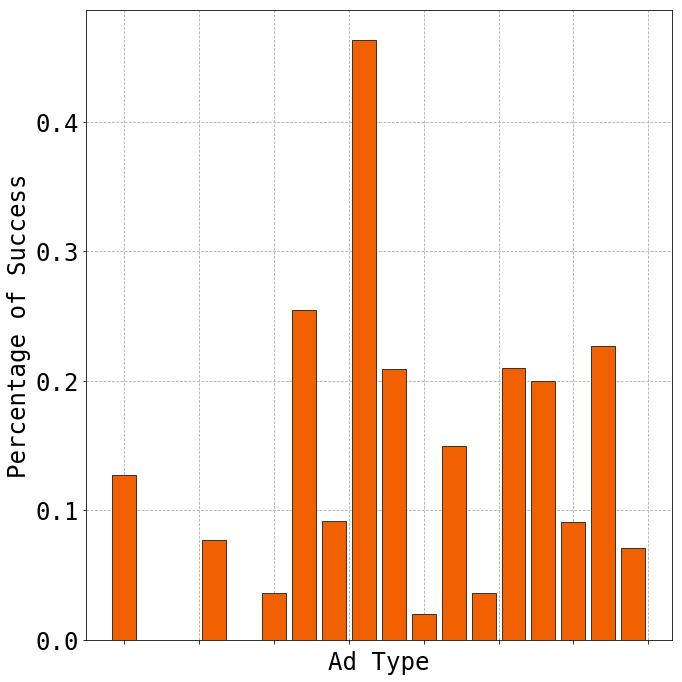

In [120]:
plot_ads(myGame.ad_dict, strat2.final_probabilities)

45.058


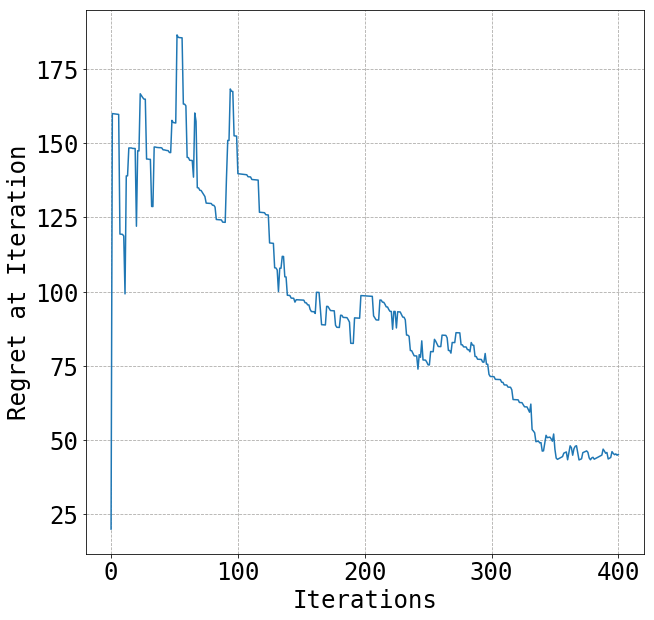

In [121]:
thresholds = [0]
myGame = Ad_Dictionary()
results = []

for threshold in thresholds:
    myGame.make_dictionary(assists = True, passes = True, threshold = threshold)
    bandits = Bandits(_dict = myGame.ad_dict)
    strat3 = Bayesian_Bandit(bandits)
    strat3.sample_bandits(401)
    # print("Number of trials: ", strat.trials)
    # print("Number of wins: ", strat.wins)
    # print("Conversion rates: ", strat.wins / strat.trials)
    # print("A total of %d wins of %d trials." %(strat.wins.sum(), strat.trials.sum())), '\n\n'

    result_dict = dict(zip(myGame.ad_dict.keys(), strat3.wins))
    results.append(result_dict)

    print regret(strat3.final_probabilities, np.array(strat3.choices))
    xvals = range(len(strat3.regret_list))
    fig = plt.figure(figsize=(10, 10))
    plt.grid(zorder = 0, linestyle = 'dashed', color = '#acaaa8')
    plt.plot(xvals, strat3.regret_list)
    plt.xlabel('Iterations')
    plt.ylabel('Regret at Iteration')
    plt.show()

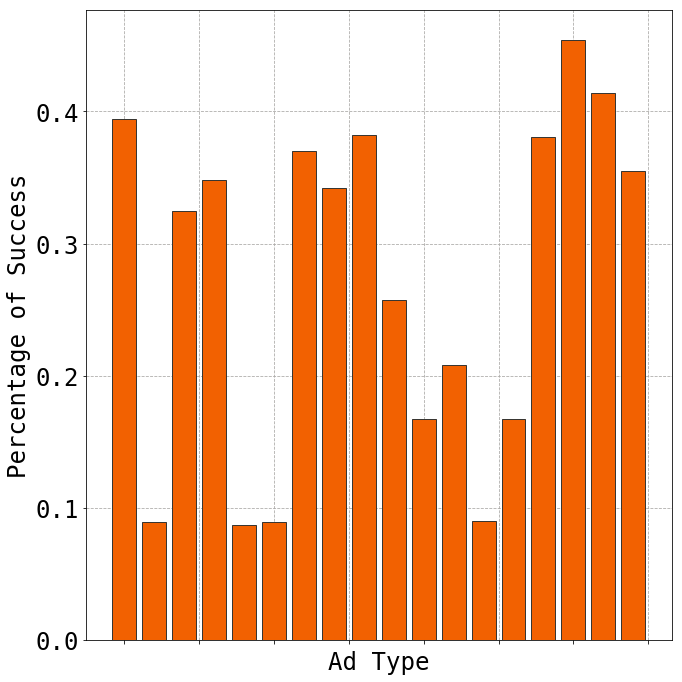

In [122]:
plot_ads(myGame.ad_dict, strat3.final_probabilities)

In [96]:
paths = []
with open('Results-From-2017-05-23/clean_paths-2017-05-23.txt') as f:
    for line in f:
        mini_path = []
        for item in line[1:-3].split(','):
            mini_path.append(item)
        paths.append(mini_path)

In [31]:
for index1, i in enumerate(paths):
    for index2, ad in enumerate(i):
        paths[index1][index2] = int(ad)

In [123]:
myGame.ad_dict
prob_dict = dict()
for keys, lst in myGame.ad_dict.iteritems():
    prob_dict[keys] = sum(lst)/(1.0*len(lst))
print prob_dict

{21172800: 0.28582202111613664, 21172929: 0.09999999999999999, 21164354: 0.38072033898305, 21172931: 0.3090090090090095, 21172932: 0.09999999999999999, 21172933: 0.2400000000000001, 21172934: 0.3362068965517244, 21172935: 0.27678571428571497, 21172936: 0.55, 21172780: 0.41428571428571415, 21172962: 0.26945010183299195, 21172782: 0.2878787878787882, 21172781: 0.20263157894736827, 21172930: 0.35540540540540555, 21164377: 0.41999999999999993, 21172783: 0.45, 21164348: 0.40035460992907607, 21172958: 0.35753424657534116}


In [73]:
def new_regret(dictionary, paths):
    max_p = max(dictionary.values())
    regret = sum((max_p - dictionary[path] for path in paths))
    return regret

In [74]:
their_regret = [new_regret(prob_dict, i) for i in paths]

In [82]:
def get_list(lst):
    newlist = []
    for i in range(1, len(lst) + 1):
        S = sum(lst[0:i])
        newlist.append(S)
    return newlist
y1 = [0.01 * i for i in get_list(strat1.regret_list)]
y2 = [0.01 * i for i in get_list(strat2.regret_list)]
y3 = [0.01 * i for i in get_list(strat3.regret_list)]
y4 = [0.01 * i for i in get_list(their_regret)]

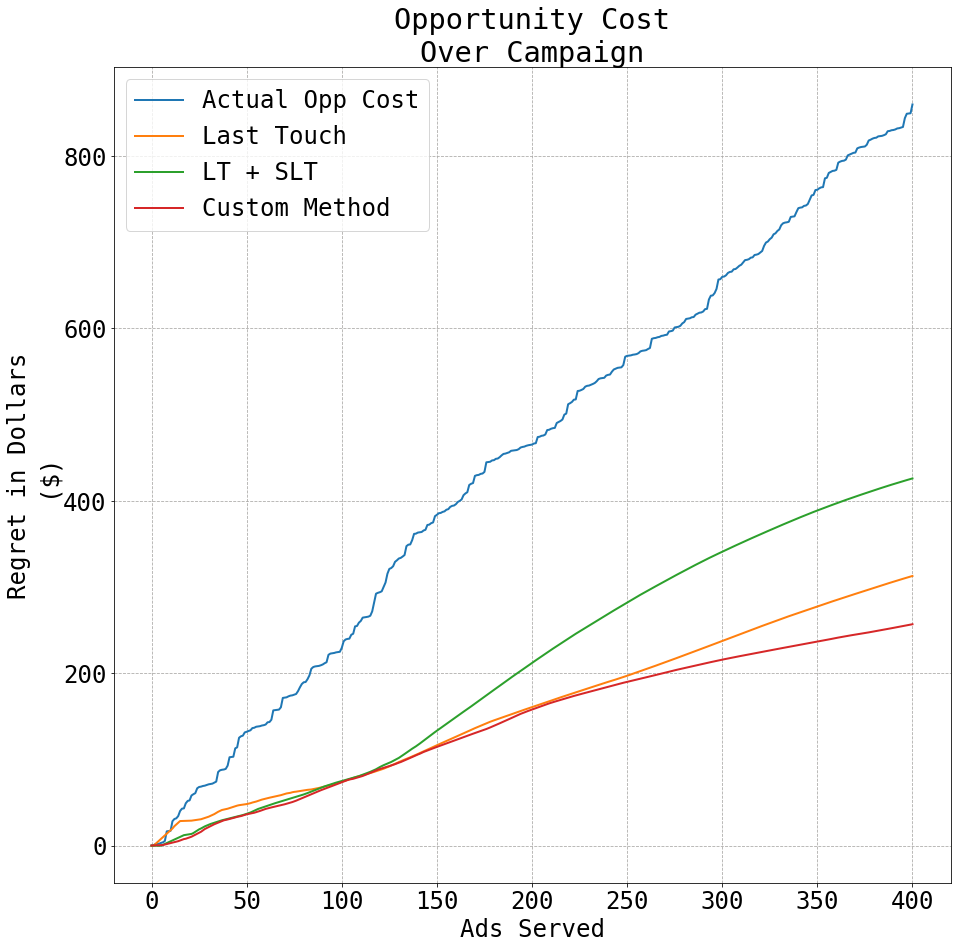

In [84]:
vals = range(len(strat3.regret_list))
fig = plt.figure(figsize=(15, 15))
plt.grid(zorder = 0, linestyle = 'dashed', color = '#acaaa8')
# plt.plot(xvals, strat3.regret_list, label = 'Custom Method', linewidth = 2)
# plt.plot(xvals, strat2.regret_list, label = 'LT + SLT', linewidth = 2)
# plt.plot(xvals, strat1.regret_list, label = 'Last Touch', linewidth = 2)
plt.plot(xvals, y4, label = 'Actual Opp Cost', linewidth = 2)
plt.plot(xvals, y1, label = 'Last Touch', linewidth = 2)
plt.plot(xvals, y2, label = 'LT + SLT', linewidth = 2)
plt.plot(xvals, y3, label = 'Custom Method', linewidth = 2)
plt.xlabel('Ads Served')
plt.ylabel('Regret in Dollars\n($)')
plt.title('Opportunity Cost\nOver Campaign')
plt.legend()
plt.show()

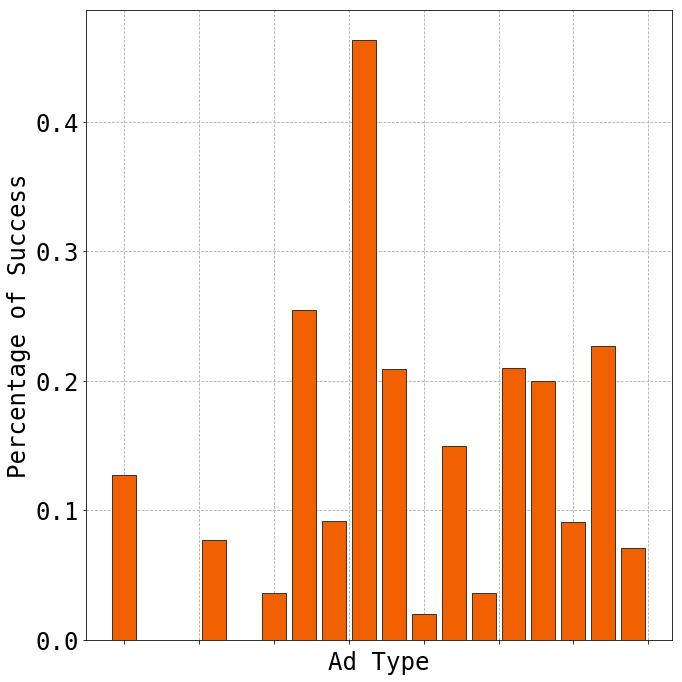

In [132]:
plot_ads(myGame.ad_dict, strat2.final_probabilities)

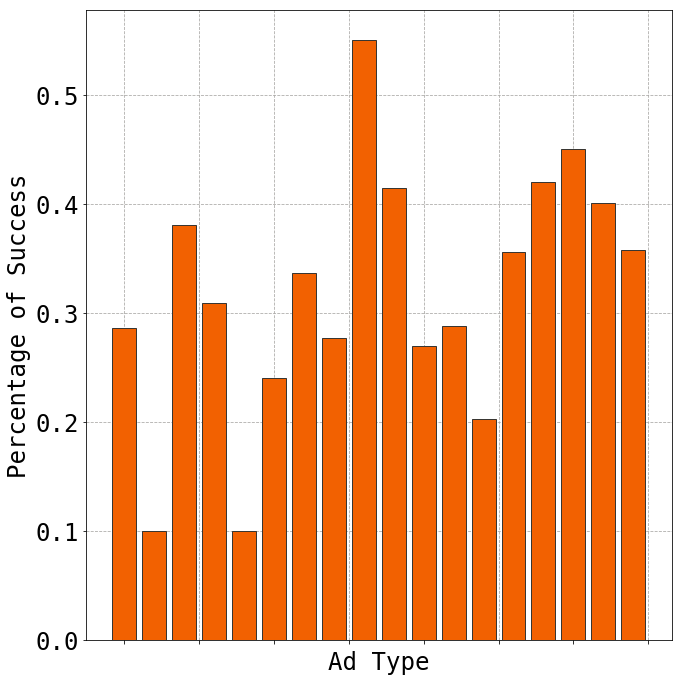

In [130]:
fig, (ax0) = plt.subplots(1, 1, figsize = (10, 10))
index = 0
ax0.grid(zorder = 0, linestyle = 'dashed', color = '#acaaa8')
ax0.bar(range(len(prob_dict)), prob_dict.values(), ec='#383632', color='#F26101', zorder = 3)
#     ax0.set_xticks(xvalues)
ax0.set_xticklabels(['']*len(xvalues))
ax0.set_ylabel('Percentage of Success')
ax0.set_xlabel('Ad Type')
plt.tight_layout()
plt.show()